<a href="https://colab.research.google.com/github/jrgreen7/SYSC4906/blob/master/W2024/SYSC4415W24__A3_Student1_Student2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Assignment 3 - Part 2 🥳


---
TA: Elmira Amooei

Questions?: Rather than email, please ask any questions through the Discussion Board on Brightspace. That way, everyone can benefit from the answer

** Deadline: See Brightspace end date**

---

### Working in teams of 2
Complete Part 2 of Assignment 3 in the same team of two students that you formed in Part 1. A single submission per team is required on Brightspace.

### Objective:
In this assignment, we are going to listen to some jazz and disco!
Yes, you read it right. We are using the GTZAN dataset to create a classifier that can tell what the music genre is! 🎷🎸🎹🎺


### Details:
In this part, you are going to implement two models.
The first model is your own **proposed model** (the exact same one you proposed in Part One). And the second model is the **pretrained model** you selected in Part One.

### Instructions:
**DO NOT** wait to the last minute to complete this assignment as it can take hours hours to do this assignment if you are unfmiliar with Python and Machine Learning libraries.

❗Your solutions must be self-contained in this notebook; no other supplementary material or files will be accepted. As soon as I open your assignment's notebook , I will click "runtime" → "run all". Ensure your notebook works properly without any errors and your results are clearly displayed, as instructed.

**Dataset:**
You are provided with two datasets on Brightspace, to be used in Parts 1 & 2 of Assignment. Download the dataset of your choice (*Note that you must use the dataset that you selected in your proposal in Assignment 3 Part 1*), store it in your Google Drive (you need a gmail account to do this). It should be under your "My Drive" (After uploading it to your Google Drive, check the location by right clicking on the file *-> File Information -> Details -> Location*).  **Do not** put it into any sub-folder as  I won't be able to run your code. It will raise an error and you will lose marks.

**Metrics:**
You must create a **confusion matrix** for each of the models you are implementing. A part of your assessment of this assignment is based on the language you use to *interpret what your confusion matrices are showing* and how you would *compare the performance of the two models* based on that.

**Pytorch:** is what we used for Assignment 2, and we are using it here as well.

**Q&A:**
There are some question boxes in *markdown blocks* marked with (🎧🎸) emojis. Your answers to these question blocks should go on the *markdown blocks* marked with (📻🎹) emojis. Just double-click on the emoji and you can start typing.*Note that I will skip over any text answers that are within the code blocks.*

**Libraries:** You can add any library you might need that is not already imported. *If you are using a library that needs to be installed on Colab, please provide the command for it in the specified code block in Section 1.1 Initializations.*

**Optional steps:** There are some code blocks marked as optional. However, feel free to really show your work and add in as much extra info as you want. This may result in bonus points based on what you are doing.😉
Examples:
 * It is optional to use cross-validation in this assignment, but you will get a bonus point for implementing it. 🎙️

 * It is optional to use a grid search to tune your hyperparameters for your own model, but you will get a bonus point for implementing it. 🎙️


**Runtime tips:** I suggest doing your coding and first making sure everything works fine on a CPU. Then do the actual model training on a GPU. To chage your runtime from CPU to GPU and vice versa, select **Runtime** -> **Change Runtime Type** -> under **Hardware accelerator** click on CPU or T4 GPU.

**Submission:** Submit your Notebook as a *.ipynb* file that adopts this naming convention: ***SYSC4415W24_A3_Student1_Student2.ipynb*** on *Brightspace*. No other submission (e.g., through email) will be accepted. (Example file name: SYSC4415W24_A3_ElmiraAmooei_AnthonyFuller.ipynb)

### Grading:
Considering the fact that Elmira is really generous with marking and she wants to see if you understand the point of data exploration, pretraining, confusion matrix, etc., she is very strict with plagiarism. Therefore, for the text answers, she will not show mercy with **suspicious** cases and they will be sent to the Associate Dean for investigation. However, it is alright if you need to consult with Chat-GPT/online resources to figure out **some parts of the code**. Although, remember that I will see a huge ton of submissions that look identical and you might get unlucky! ☠️

You will be evaluated on the performance your model achieved. Try to tune your model to achieve the best possible results you can. You are asked in a *markdown block* to explain what you attempted and explored. (Your work is not compared with any other teams, this is not a competition.)


# 1. Initializations


Some basic ibraries you need are imported here. Make sure you include whatever library you need in this entire notebook in the code block below.

*Note that you **DO NOT** need to use ```cv2``` or ```PIL``` at all! So, please figure out a simpler and more general way of plotting. They should not be imported or used in this notebook as you will be penalized.*

In case you are using any library that requires installation, please paste the installation command for it here.
Leave the code block below if you are not installing any libraries.

In [2]:
# Libraries to install - leave this code block blank if this does not apply to you
# Please add a brief comment on why you need the library and what it does

# For dealing with wav files feature extraction
from scipy.io import wavfile
from scipy.signal import spectrogram

# Additional installation for modelling - as discussed in the proposal - YamNet model from tensorflow
import torch.nn.functional as F
import tensorflow as tf
import tensorflow_hub as hub

# For processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
!pip install tensorflow-io
import tensorflow_io as tfio

# Load Tensorflow Dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten



In [3]:
# Libraries you might need
# General
import os
import zipfile
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# For preproccessing
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# For modeling
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import torchsummary

# For metrics
from sklearn.metrics import  accuracy_score
from sklearn.metrics import  precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import  classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import confusion_matrix


This code block will mount google drive.

*It will open a new window to get authorizations to use your Google Drive. Just follow the steps. This is a standard process*

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1.2 Create path

*If you absolutely need to change the paths, please do it on the code block below only **and the code block below only**. Because I will run your notebook and if you have other paths defined anywhere else it will raise errors and you will lose mark.*

In [5]:
# Path for extractions
zip_file_paths = ['/content/drive/My Drive/GTZAN Genre Collection.zip']

dataset_dirs = ['/content/drive/My Drive/GTZAN Genre Collection/']

for zip_file_path, dataset_dir in zip(zip_file_paths, dataset_dirs):
    if os.path.exists(zip_file_path):
        print(f"Extracting {zip_file_path} to {dataset_dir}")
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(dataset_dir)
    else:
        print(f"Zip file {zip_file_path} does not exist.")


Extracting /content/drive/My Drive/GTZAN Genre Collection.zip to /content/drive/My Drive/GTZAN Genre Collection/


#### 1.3 Load your data and see how it looks

The minimum details you need to provide are:

1.   Show how many categories/classes there are in the dataset using ```print()```,
2.   Show how many samples are present in each category using ```print()```,
2.   Plot the class distributions for the dataset using ```matplotlib```,



In [6]:
# Get a count of the samples

# NOTE: This part is extracted from Part 1 of the assignment:

def extract_features(file_path):
    try:
        rate, audio = wavfile.read(file_path)

        # Calculating spectrogram: Help for the code found on a youtube guide at
        # https://www.youtube.com/watch?v=PYlr8ayHb4g (However, we used scipy for audio processing instead of the librosa library)
        _, _, Sxx = spectrogram(audio, fs=rate)
        mean_spectrogram = np.mean(Sxx, axis=1)
        std_spectrogram = np.std(Sxx, axis=1)

        return mean_spectrogram, std_spectrogram

    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None



data_folder = "/content/drive/MyDrive/GTZAN Genre Collection/GTZAN Genre Collection"

data = []

# Here, we will iterate through each genre folder (rock, reggae, blues, etc ...)
for genre in os.listdir(data_folder):
    genre_folder = os.path.join(data_folder, genre)
    if os.path.isdir(genre_folder):

        num_samples = len(os.listdir(genre_folder))
        print(f"{genre}: {num_samples} samples")

        # The feature extraction function is applied here
        for file in os.listdir(genre_folder):
            file_path = os.path.join(genre_folder, file)
            features = extract_features(file_path)
            if features:
                data.append((*features, genre))

# Finally, creating the dataframe
df = pd.DataFrame(data, columns=['mean_spectrogram', 'std_spectrogram', 'genre'])
df.head()


reggae: 100 samples
pop: 100 samples
metal: 100 samples
disco: 100 samples
jazz: 100 samples
Error extracting features from /content/drive/MyDrive/GTZAN Genre Collection/GTZAN Genre Collection/jazz/jazz.00054.wav: File format b'\xcb\x15\x1e\x16' not understood. Only 'RIFF' and 'RIFX' supported.
rock: 100 samples
classical: 100 samples
country: 100 samples
blues: 100 samples
hiphop: 100 samples


,mean_spectrogram,std_spectrogram,genre
0,"[180.41853, 8109.3555, 3732.2578, 2895.5913, 2...","[323.311, 12247.187, 6064.741, 3734.6458, 2705...",reggae
1,"[4814.0864, 287545.0, 29847.959, 9709.94, 5514...","[12260.901, 605365.06, 71801.414, 18298.756, 1...",reggae
2,"[3996.7588, 247791.58, 38016.305, 14907.537, 5...","[5339.416, 249129.77, 58980.66, 20020.314, 869...",reggae
3,"[738.5252, 4165.822, 11197.035, 33815.367, 414...","[1398.7161, 6496.1045, 19914.969, 63218.043, 8...",reggae
4,"[967.30725, 40356.918, 14770.3, 8778.366, 1010...","[2823.0535, 118965.03, 31186.71, 23380.193, 21...",reggae


When using the extract_features function above, one error has been constantly occuring on the 'jazz' folder on file jazz.00054.wav. The output from running the above is expected to be as follows:

reggae: 100 samples
pop: 100 samples
metal: 100 samples
disco: 100 samples
jazz: 100 samples
Error extracting features from /content/drive/MyDrive/GTZAN Genre Collection/GTZAN Genre Collection/jazz/jazz.00054.wav: File format b'\xcb\x15\x1e\x16' not understood. Only 'RIFF' and 'RIFX' supported.
rock: 100 samples
classical: 100 samples
country: 100 samples
blues: 100 samples
hiphop: 100 samples


<ipython-input-7-858bb5e6eb27>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre', data=df, palette='Set2')


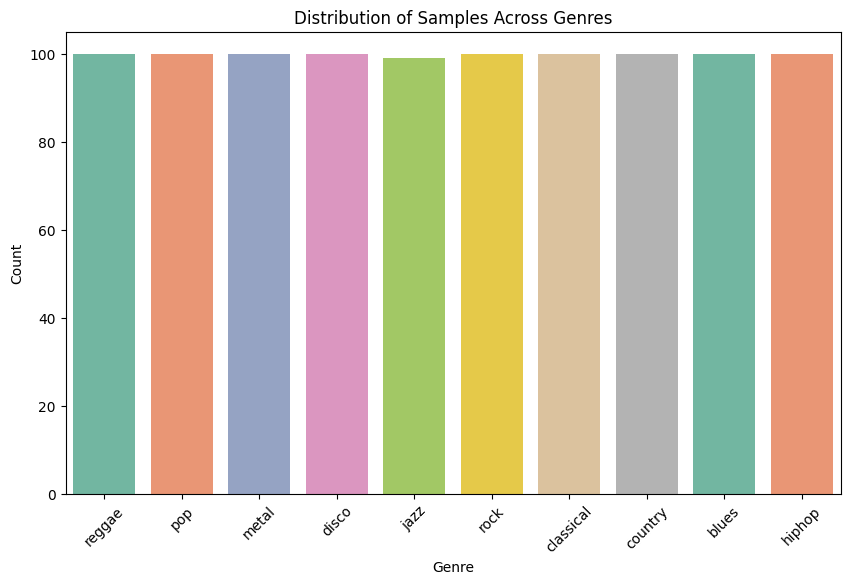

In [7]:
# Plot the class distributions

# Note: Again, this code is recycled from the part 1 submission:
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=df, palette='Set2')
plt.title('Distribution of Samples Across Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [8]:
# Any additional data visualizations or exploratory analysis - This is optional, but highly recommended

"""
The conclusion from the above visualization is that all classes have 100 samples. This value will be used further down the road to determine split sizes for training,
"""


'\nThe conclusion from the above visualization is that all classes have 100 samples. This value will be used further down the road to determine split sizes for training,\n'

# 2. Preprocessing

The minimum you need here is to:
1. Create your DataLoaders,
2. Create train and test splits.

Please do normalization/scaling or any additional proposed preproccessing here (Including anyt preprocessing steps you have included in your proposal.)


<ipython-input-9-1249b68b5102>:19: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  return torch.tensor(features, dtype=torch.float32), label


Sample 1: Features - tensor([[3.7643e+02, 7.3181e+03, 1.3749e+04, 1.1048e+04, 7.2141e+03, 6.9256e+03,
         1.0510e+04, 1.0529e+04, 3.4912e+03, 8.5810e+02, 5.9067e+02, 6.0645e+02,
         5.1673e+02, 4.3757e+02, 3.8213e+02, 3.0886e+02, 1.8655e+02, 2.7159e+02,
         2.6549e+02, 5.3213e+02, 4.2207e+02, 5.0586e+02, 5.3706e+02, 3.4864e+02,
         3.5365e+02, 2.6036e+02, 1.8135e+02, 2.1316e+02, 2.3577e+02, 2.4707e+02,
         3.0567e+02, 1.9726e+02, 2.1593e+02, 2.6199e+02, 1.6242e+02, 2.3099e+02,
         3.1996e+02, 3.1682e+02, 2.6785e+02, 2.3520e+02, 1.6262e+02, 1.0828e+02,
         6.4355e+01, 4.1635e+01, 4.9000e+01, 3.1905e+01, 5.2895e+01, 3.0804e+01,
         2.3419e+01, 2.4303e+01, 1.5054e+01, 2.4517e+01, 5.4143e+01, 1.9936e+01,
         1.1450e+01, 1.3855e+01, 1.5165e+01, 6.4793e+00, 1.3327e+01, 1.6503e+01,
         5.8200e+00, 6.1887e+00, 6.9723e+00, 5.5772e+00, 5.0636e+00, 5.7159e+00,
         7.1202e+00, 6.5929e+00, 6.4711e+00, 7.9009e+00, 9.3481e+00, 8.8919e+00,
       

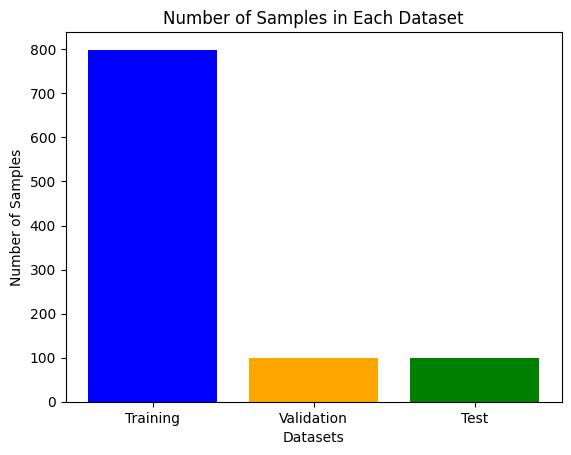

In [9]:
# Encoding the Genre Labels
label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])

# Train-Test Split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

class MusicDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        features = (row['mean_spectrogram'], row['std_spectrogram'])
        label = row['genre_encoded']
        return torch.tensor(features, dtype=torch.float32), label

batch_size = 32

train_dataset = MusicDataset(train_df)

# View 2 samples in the train dataset for confirmation
for idx in range(2):
    features, label = train_dataset[idx]
    print(f"Sample {idx + 1}: Features - {features}, Label - {label}")

val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)
test_dataset = MusicDataset(test_df)
val_dataset = MusicDataset(val_df)

# Creating the data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# print(len(train_loader.dataset))
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# print(len(train_dataset))
# print(len(train_df))

# print(len(test_dataset))
# print(len(test_df))

# print(len(val_dataset))
# print(len(val_df))

# Optional exercise :) - visualize the datasets sample counts
def plot_dataset_counts(train_count, val_count, test_count):
    labels = ['Training', 'Validation', 'Test']
    counts = [train_count, val_count, test_count]
    plt.bar(labels, counts, color=['blue', 'orange', 'green'])
    plt.xlabel('Datasets')
    plt.ylabel('Number of Samples')
    plt.title('Number of Samples in Each Dataset')
    plt.show()

train_count = len(train_df)
val_count = len(val_df)
test_count = len(test_df)

plot_dataset_counts(train_count, val_count, test_count)
# Conclusion: 800 samples in train, 100 in val and 100 in test - seen from the visualization below

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/drive/MyDrive/GTZAN Genre Collection/GTZAN Genre Collection/blues/blues.00089.wav'>, <tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/drive/MyDrive/GTZAN Genre Collection/GTZAN Genre Collection/blues/blues.00064.wav'>, <tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/drive/MyDrive/GTZAN Genre Collection/GTZAN Genre Collection/blues/blues.00034.wav'>, <tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/drive/MyDrive/GTZAN Genre Collection/GTZAN Genre Collection/blues/blues

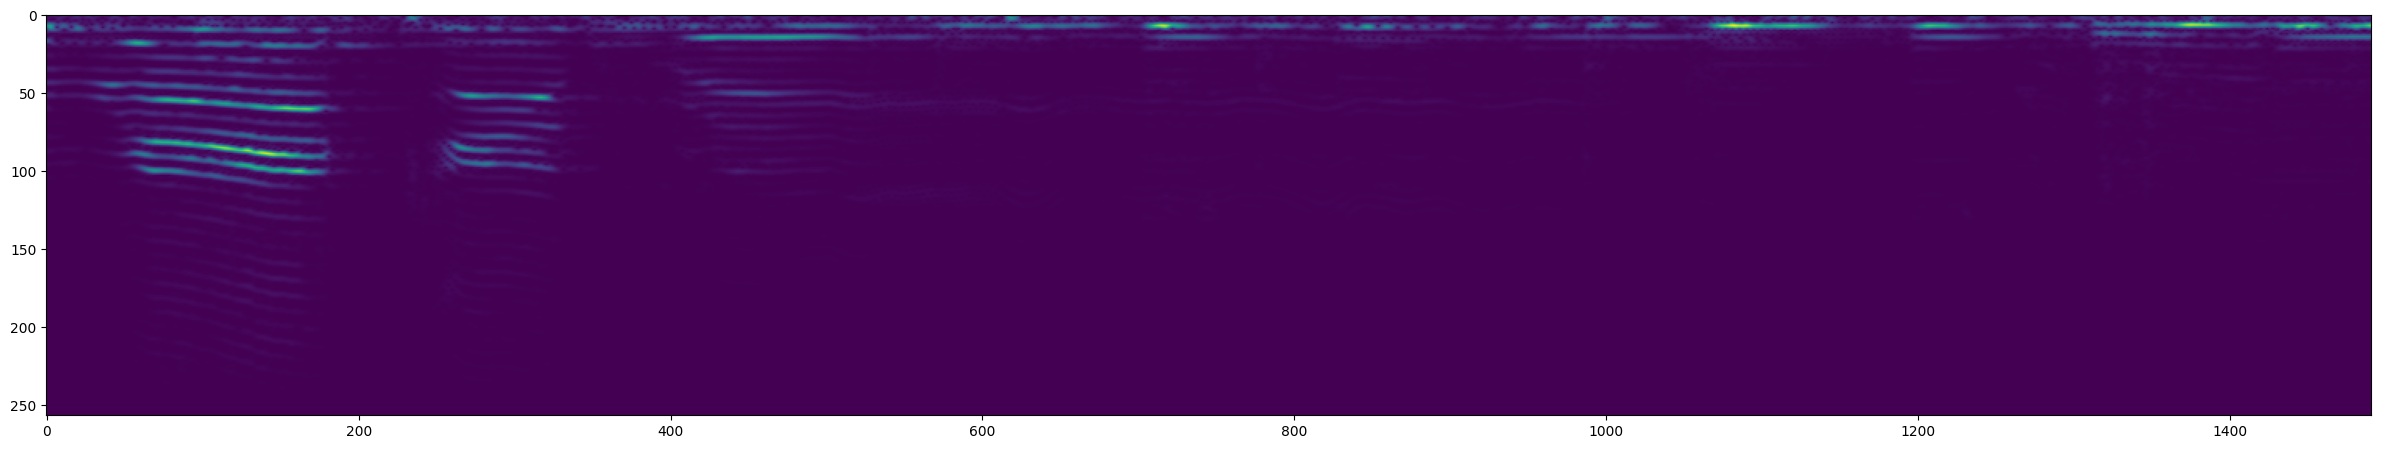

In [10]:
# Any additional preproccessing
# Printing all the associated classes that have been encoded using OHE
class_names = label_encoder.classes_

# Associating encoding with classes in a dictionary
class_name_to_encoding = {class_name: encoding for encoding, class_name in enumerate(class_names)}

print(class_name_to_encoding)

def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

BLUES = os.path.join(data_folder, 'blues')
CLASSICAL = os.path.join(data_folder, 'classical')
COUNTRY = os.path.join(data_folder, 'country')
DISCO = os.path.join(data_folder, 'disco')
HIPHOP = os.path.join(data_folder, 'hiphop')
JAZZ = os.path.join(data_folder, 'jazz')
METAL = os.path.join(data_folder, 'metal')
POP = os.path.join(data_folder, 'pop')
REGGAE = os.path.join(data_folder, 'reggae')
ROCK = os.path.join(data_folder, 'rock')

# creating the datasets
blues = tf.data.Dataset.list_files(BLUES+'/*.wav')
classical = tf.data.Dataset.list_files(CLASSICAL+'/*.wav')
country = tf.data.Dataset.list_files(COUNTRY+'/*.wav')
disco = tf.data.Dataset.list_files(DISCO+'/*.wav')
hiphop = tf.data.Dataset.list_files(HIPHOP+'/*.wav')
jazz = tf.data.Dataset.list_files(JAZZ+'/*.wav')
metal = tf.data.Dataset.list_files(METAL+'/*.wav')
pop = tf.data.Dataset.list_files(POP+'/*.wav')
reggae = tf.data.Dataset.list_files(REGGAE+'/*.wav')
rock = tf.data.Dataset.list_files(ROCK+'/*.wav')



# Create labels for each genre
num_blues = len(blues)
blues_labels = tf.one_hot(tf.fill((num_blues,), 0), depth=10)

num_classical = len(classical)
classical_labels = tf.one_hot(tf.fill((num_classical,), 1), depth=10)

num_country = len(country)
country_labels = tf.one_hot(tf.fill((num_country,), 2), depth=10)

num_disco = len(disco)
disco_labels = tf.one_hot(tf.fill((num_disco,), 3), depth=10)

num_hiphop = len(hiphop)
hiphop_labels = tf.one_hot(tf.fill((num_hiphop,), 4), depth=10)

num_jazz = len(jazz)
jazz_labels = tf.one_hot(tf.fill((num_jazz,), 5), depth=10)

num_metal = len(metal)
metal_labels = tf.one_hot(tf.fill((num_metal,), 6), depth=10)

num_pop = len(pop)
pop_labels = tf.one_hot(tf.fill((num_pop,), 7), depth=10)

num_reggae = len(reggae)
reggae_labels = tf.one_hot(tf.fill((num_reggae,), 8), depth=10)

num_rock = len(rock)
rock_labels = tf.one_hot(tf.fill((num_rock,), 9), depth=10)

# Combine samples and labels into datasets
blues = tf.data.Dataset.zip((blues, tf.data.Dataset.from_tensor_slices(blues_labels)))
classical = tf.data.Dataset.zip((classical, tf.data.Dataset.from_tensor_slices(classical_labels)))
country = tf.data.Dataset.zip((country, tf.data.Dataset.from_tensor_slices(country_labels)))
disco = tf.data.Dataset.zip((disco, tf.data.Dataset.from_tensor_slices(disco_labels)))
hiphop = tf.data.Dataset.zip((hiphop, tf.data.Dataset.from_tensor_slices(hiphop_labels)))
jazz = tf.data.Dataset.zip((jazz, tf.data.Dataset.from_tensor_slices(jazz_labels)))
metal = tf.data.Dataset.zip((metal, tf.data.Dataset.from_tensor_slices(metal_labels)))
pop = tf.data.Dataset.zip((pop, tf.data.Dataset.from_tensor_slices(pop_labels)))
reggae = tf.data.Dataset.zip((reggae, tf.data.Dataset.from_tensor_slices(reggae_labels)))
rock = tf.data.Dataset.zip((rock, tf.data.Dataset.from_tensor_slices(rock_labels)))

# Combine all datasets into a list
all_datasets = [blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock]

# Concatenate all datasets
data = all_datasets[0]
for dataset in all_datasets[1:]:
    data = data.concatenate(dataset)

# Iterate through the concatenated dataset and print the elements
for element in data.take(5):
    print(element)

# Preprocessing function to convert to spectogram
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

# Testing the preprocessing function
filepath, label = blues.shuffle(buffer_size=10000).as_numpy_iterator().next()
spectrogram, label = preprocess(filepath, label)
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# Creating the data pipelines
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

TRAIN_COUNT = 51
TEST_COUNT = 12

train = data.take(TRAIN_COUNT)
test = data.skip(TRAIN_COUNT).take(TEST_COUNT)

In [40]:
sample_shape = None
print(type(train))

for sample_tuple in train.take(1):  # Take one sample
    for sample in sample_tuple:
        try:
            sample_shape = sample.shape
            print("Sample shape:", sample_shape)
        except UnicodeDecodeError as e:
            print(f"UnicodeDecodeError occurred: {e}")
            # Skip the problematic sample and continue to the next iteration
            continue
        except AttributeError as e:
            print(f"AttributeError occurred: {e}")


print("Sample shape:", sample_shape)

<class 'tensorflow.python.data.ops.take_op._TakeDataset'>
Sample shape: (16, 1491, 257, 1)
Sample shape: (16, 10)
Sample shape: (16, 10)


# 3. Your proposed model

🎧🎸 Explain the steps you took to tune your model and how each step affected your performance. (This answer can be as detailed as you want, don't keep it short.)

* In case you are using grid search for hyperparamter tuning: Why and how are you choosing the grid limits/steps? Give details.

📻🎹

Feel free to add in more code blocks. Please include some comments on what you are doing within the code.

*Add comments to describe the key concepts of the code and its function. It does not need to be line-by-line. Keep it short.*

In [11]:
# Initialize the model, loss function, and optimizer


In [12]:
#Train


In [13]:
# Test the model suign one chosen metric

In [14]:
# Compute and plot the confusion matrix


# 4. Your pretrained model

The library below is a great source that possibly covers your proposed pretrained model selected in your proposal. There is a link provided that covers an example implementation. It's very straightforward and needs minimum tweaks.

[Pytorch pretrained models](https://pytorch.org/vision/stable/models.html)

Feel free to adjust the code blocks in this section as you see fit.


**Note that your code needs to run flawlessly. (If you are using any pretrained model that is not covered in the library above.) Therefore, please make sure you have every required installations and libraries imported under section 1.1.**

In [15]:
# Initialize the model, loss function, and optimizer
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 6019376)           0         
                                                                 
 dense (Dense)               (None, 128)               770480256 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 770482865 (2.87 GB)
Trainable params: 770482865 (2.87 GB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Test the model using the same chosen metric as your own model
hist = model.fit(train, epochs=4, validation_data=test)
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

X_test, y_test = test.as_numpy_iterator().next()
yhat = model.predict(X_test)


Epoch 1/4


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5822, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 10)).


In [ ]:
# Compute and plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Comparisons

🎧🎸 How did you compare your proposed model and the pretrained model in terms of performance? Is your model doing a better/worse job than the pretrained model? Why?
Describing confusion matrices is neccessary to answer this question.
You can also include other metrics, such as accuracy, train-time, etc.

📻🎹

🎧🎸 What will you do differently? Why?
> In terms of the dataset, preproccessing, modeling, etc.

📻🎹

All done! 🎶💃🕺

## 5. Optional challenge!

You are not graded for this part, but I will provide feedback if you gave it a shot!

Believe me, it is a cool piece 🎺

As your model can classify music genres, can you challenge yourselves to have your model listen to you playing a piece of music (e.g., on Spotify) and classify its genre in real-time?

**Hint 01:** ```pyaudio``` is a library you can use.

**Hint 02:** You need to do the same preproccessing on the live data as you did for your model.

**Hint 03:** You need to put your model into the ```.eval()``` state. Don't forget to save the model weights so that you can do load it using ```model.load_state_dict(torch.load('MyModel_weights.pth'))```

**Hint 04:** Your code block needs to listen to the music you are playing, so maybe you can put it in a ```try: while True:``` and ```except KeyboardInterrupt``` loop.